# handwritten digit recognition for digit 2 on MNIST dataset

In [2]:
##Fetching dataset

In [6]:
from sklearn.datasets import fetch_openml

In [13]:
mnist = fetch_openml('mnist_784',parser='auto')

In [14]:
print(mnist)

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9   
0           0       0       0       0       0       0       0       0       0  \
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995       0       0       0       0       0       0       0       0       0   
69996       0       0       0       0       0       0       0       0       0   
69997       0       0       0       0       0       0       0       0       0   
69998       0       0       0       0       0       0       0       0       0   
69999       0       0       0       0       0       0       0       0       0   

       pixel10  ..

In [16]:
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9   
 0           0       0       0       0       0       0       0       0       0  \
 1           0       0       0       0       0       0       0       0       0   
 2           0       0       0       0       0       0       0       0       0   
 3           0       0       0       0       0       0       0       0       0   
 4           0       0       0       0       0       0       0       0       0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995       0       0       0       0       0       0       0       0       0   
 69996       0       0       0       0       0       0       0       0       0   
 69997       0       0       0       0       0       0       0       0       0   
 69998       0       0       0       0       0       0       0       0       0   
 69999       0       0       0       0       0       0       0       0       0   
 
      

In [17]:
x, y = mnist['data'], mnist['target']

In [23]:
type(x)

pandas.core.frame.DataFrame

In [24]:
x.shape

(70000, 784)

In [25]:
y.shape

(70000,)

In [37]:
x.iloc

In [26]:
%matplotlib inline

In [40]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

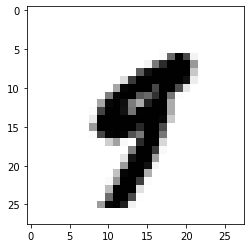

'9'

In [51]:
some_digit = x.to_numpy()[36000]
some_digit_image = some_digit.reshape(28, 28)  # let's reshape to plot it

plt.imshow(some_digit_image, cmap=matplotlib.cm.binary,
           interpolation='nearest')
#plt.axis("off")
plt.show()
some_digit_target=y.to_numpy()[36000]
some_digit_target

In [109]:
some_digit = x.to_numpy()[36001]

In [110]:
some_digit_image = some_digit.reshape(28, 28)

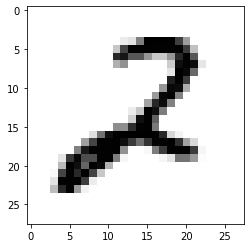

In [111]:
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation='nearest')

(0.0, 1.0, 0.0, 1.0)

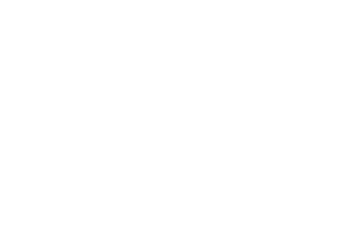

In [112]:
plt.axis("off")

In [113]:
plt.show()

In [114]:
x_train, x_test = x[:60000], x[60000:70000]

In [115]:
y_train, y_test = y[:60000], y[6000:7000]

In [116]:
shuffle_index = np.random.permutation(6000)

In [117]:
x_train, y_train = x_train.iloc[shuffle_index], y_train.iloc[shuffle_index]

In [118]:
#creating a 2-detector
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_2 = (y_train == 2)
y_test_2 = (y_test == 2)
y_train_2

3895    False
2439    False
4939    False
3748     True
5620    False
        ...  
3340    False
4127    False
1116    False
5484    False
1560    False
Name: class, Length: 6000, dtype: bool

In [133]:
clf = LogisticRegression()

In [134]:
training = clf.fit(x_train, y_train_2)
print(training)

LogisticRegression()


/home/bchaudhary/Workspace/bcenv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [121]:
example = clf.predict([some_digit])
example

/home/bchaudhary/Workspace/bcenv/lib/python3.8/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([ True])

In [129]:
from sklearn.model_selection import cross_val_score
a = cross_val_score(clf, x_train, y_train_2, cv=3, scoring="accuracy")
a

/home/bchaudhary/Workspace/bcenv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/bchaudhary/Workspace/bcenv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

array([0.961 , 0.9525, 0.959 ])

In [130]:
a.mean()

0.9575